In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [56]:
df = pd.read_csv("Downloads/pokemon_data_science_(2).csv")

In [57]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [58]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [59]:
df2 = df[['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
df2['Type_2'] = df2['Type_2'].fillna('None')
df2

<ipython-input-59-6459ecb335a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Charmander,Fire,None,309,39,52,43,60,50,65
4,Charmeleon,Fire,None,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...
716,Yveltal,Dark,Flying,680,126,131,95,131,98,99
717,Zygarde,Dragon,Ground,600,108,100,121,81,95,95
718,Diancie,Rock,Fairy,600,50,100,150,100,150,50
719,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70


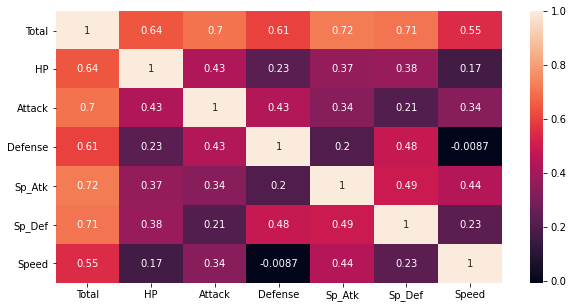

In [62]:
#defense = df[['Defense', 'Sp_Def', 'HP']]

plt.figure(figsize=(10, 5)) 
sns.heatmap(df2.corr(), annot=True)
plt.show()

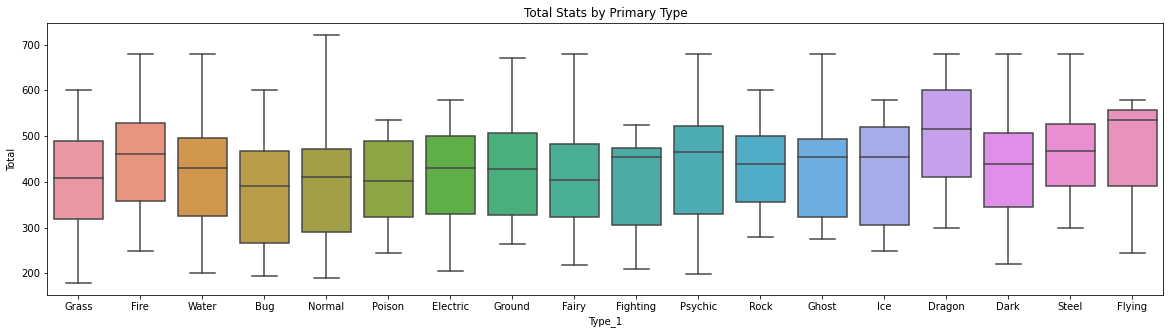

In [28]:
plt.subplots(figsize = (20, 5))
plt.title('Total Stats by Primary Type')
sns.boxplot(x = "Type_1", y = "Total", data = df)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Defense', ylabel='Speed'>

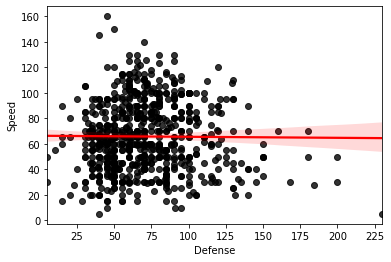

In [84]:
sns.regplot(df2['Defense'], df2['Speed'], color="black", line_kws=dict(color="red"))


In [64]:
df2['Attack_combined'] = df2['Attack'] + df2['Sp_Atk'] + df2['Speed']
df2['Defense_combined'] = df2['Defense'] + df2['Sp_Def'] + df2['HP']
df2

<ipython-input-64-381f15b24503>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-381f15b24503>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Attack_combined,Defense_combined
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,159,159
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,202,203
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,262,263
3,Charmander,Fire,None,309,39,52,43,60,50,65,177,132
4,Charmeleon,Fire,None,405,58,64,58,80,65,80,224,181
...,...,...,...,...,...,...,...,...,...,...,...,...
716,Yveltal,Dark,Flying,680,126,131,95,131,98,99,361,319
717,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,276,324
718,Diancie,Rock,Fairy,600,50,100,150,100,150,50,250,350
719,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70,330,270


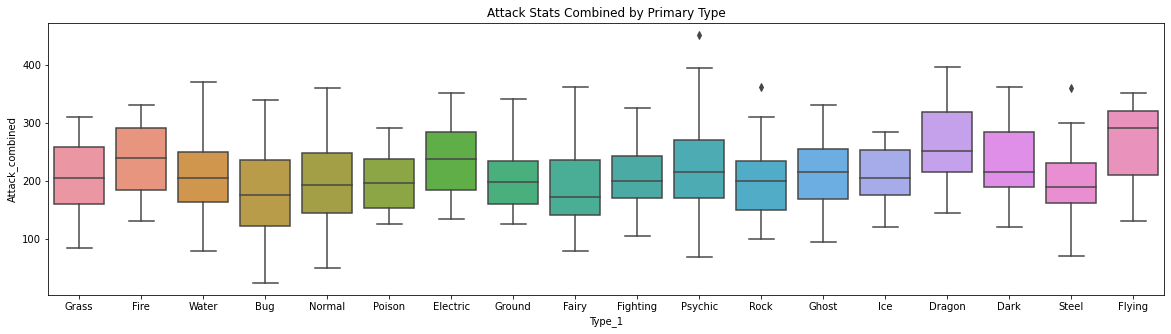

In [65]:
plt.subplots(figsize = (20, 5))
plt.title('Attack Stats Combined by Primary Type')
sns.boxplot(x = "Type_1", y = "Attack_combined", data = df2)
plt.show()

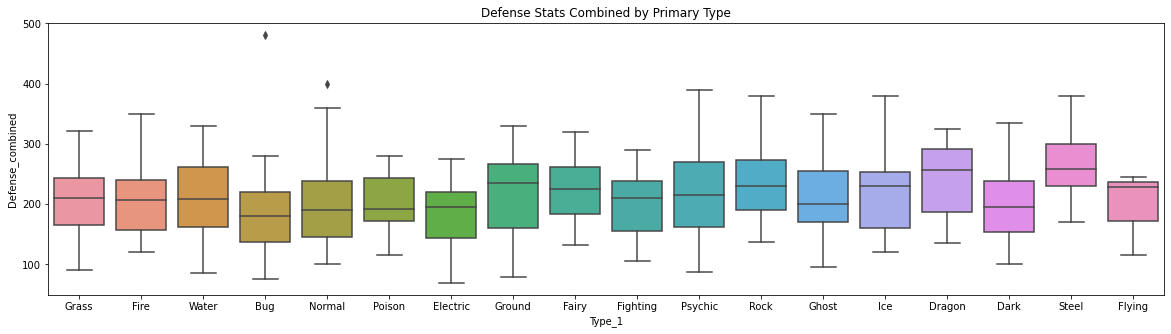

In [66]:
plt.subplots(figsize = (20, 5))
plt.title('Defense Stats Combined by Primary Type')
sns.boxplot(x = "Type_1", y = "Defense_combined", data = df2)
plt.show()

In [71]:
df2.groupby(['Type_1'])['Attack_combined'].describe()

,count,mean,std,min,25%,50%,75%,max
Type_1,,,,,,,,
Bug,63.0,179.317460,72.336094,25.0,122.50,175.0,235.00,339.0
Dark,28.0,232.142857,67.183946,120.0,188.75,215.0,284.00,361.0
Dragon,24.0,261.750000,75.638873,145.0,214.75,252.0,318.00,395.0
Electric,36.0,234.388889,57.282896,135.0,185.00,238.0,283.50,351.0
Fairy,17.0,188.647059,69.887357,80.0,141.00,172.0,235.00,361.0
Fighting,25.0,206.160000,57.705921,105.0,171.00,200.0,242.00,325.0
Fire,47.0,240.063830,57.490795,130.0,183.50,240.0,291.50,330.0
Flying,3.0,257.000000,114.135884,130.0,210.00,290.0,320.50,351.0
Ghost,23.0,209.652174,61.393373,95.0,168.00,215.0,255.00,330.0


In [89]:
df2.groupby(['Type_1'])['Defense_combined'].describe()
df2.loc[:, 'Defense_combined'].mean()

208.47988904299584

In [53]:
df3 = df2[(df2['Type_1'] == 'Dragon') | (df2['Type_1'] == 'Steel')]
df3

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Attack_combined,Defense_combined
146,Dratini,Dragon,None,300,41,64,45,50,50,50,164,136
147,Dragonair,Dragon,None,420,61,84,65,70,70,70,224,196
148,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,314,286
207,Steelix,Steel,Ground,510,75,85,200,55,65,30,170,340
226,Skarmory,Steel,Flying,465,65,80,140,40,70,70,190,275
302,Mawile,Steel,Fairy,380,50,85,85,55,55,50,190,190
303,Aron,Steel,Rock,330,50,70,100,40,40,30,140,190
304,Lairon,Steel,Rock,430,60,90,140,50,50,40,180,250
305,Aggron,Steel,Rock,530,70,110,180,60,60,50,220,310
333,Altaria,Dragon,Flying,490,75,70,90,70,105,80,220,270


<ipython-input-98-9244c2583fd6>:13: MatplotlibDeprecationWarning:

Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



Text(0.5, 1.0, 'Offensive Stats Comparison')

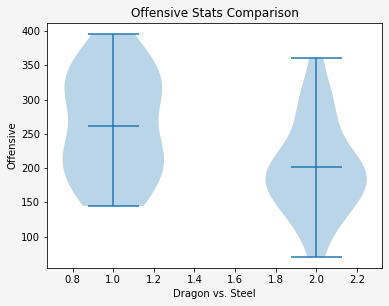

In [98]:
fig, ax = plt.subplots(
    figsize=(6, 4.5),
    facecolor="whitesmoke"
)

ax.violinplot(
    (
        df2["Attack_combined"][df2["Type_1"] == "Dragon"],
        df2["Attack_combined"][df2["Type_1"] == "Steel"],
    ),
    showmeans=True,
)
ax.set_xticks((1, 2), ("Dragon", "Others"))
ax.set_xlabel("Dragon vs. Steel")
ax.set_ylabel("Offensive")
ax.set_title("Offensive Stats Comparison")